# Рішення ОДУ однокрокові методи

## Імпорт пакетів

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import RK23

## Приклад 1.1

### y=t^2-y^2 ,  y0=1   t0=0<t<1

### Пряме використання залежностей

In [4]:
def raight_part (t, y): return t*t-y*y
def k1 (h): return raight_part (t, y)
def k2 (h): return raight_part (t+0.5*h, y+0.5*h*k1(h))    
def k3 (h): return raight_part (t+0.5*h, y+0.5*h*k2(h))
def k4 (h): return raight_part (t+h, y+h*k3(h))

In [5]:
# НАЙПРОСТІША ПРОГРАМА 
y0 = 0 # почткові умови
ts = 0.0 # початок відрізку інтегрування
tf = 1.0 # кінець відрізку інтегрування
n  = 10  # кількість кроків
h  = (tf-ts)/n  # довжина кроку
solution = np.zeros([2, n+1], dtype=np.float64) # масив результаті інтегрування
solution [0,0] = ts
solution [1,0] = y0
y = y0
t = ts
i = 0
while i < n:
    y += h*(k1(h)+2*k2(h)+2*k3(h)+k4(h))/6
    i +=1
    t += h
    solution [0,i] = t
    solution [1,i] = y
print (solution)

[[0.00000000e+00 1.00000000e-01 2.00000000e-01 3.00000000e-01
  4.00000000e-01 5.00000000e-01 6.00000000e-01 7.00000000e-01
  8.00000000e-01 9.00000000e-01 1.00000000e+00]
 [0.00000000e+00 3.33331771e-04 2.66645801e-03 8.99650542e-03
  2.13073014e-02 4.15429914e-02 7.15588830e-02 1.13044498e-01
  1.67417928e-01 2.35697425e-01 3.18365469e-01]]


<function matplotlib.pyplot.show(*args, **kw)>

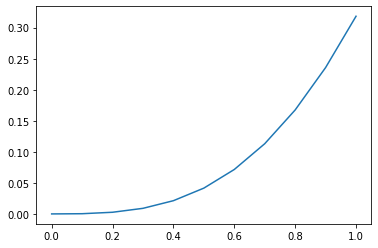

In [6]:
plt.plot(solution [0, ], solution [1, ])
plt.show

### y=t^2-y^2 ,  y0=1   t0=0<t<1

In [7]:
def ex1 (t, y): return t*t-y*y
ts=0.0
tf=1.0
x0=np.array([0])
sol = solve_ivp(ex1, [ts,tf], x0, RK23)
print(sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 59
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, 1.11000000e-02,
       3.70644366e-02, 6.31709852e-02, 8.98392577e-02, 1.17742856e-01,
       1.47750580e-01, 1.80868993e-01, 2.18209679e-01, 2.60989665e-01,
       3.10562466e-01, 3.68479206e-01, 4.36593759e-01, 5.17259430e-01,
       6.13752870e-01, 7.31353367e-01, 8.80844881e-01, 1.00000000e+00])
 t_events: None
        y: array([[0.00000000e+00, 3.33333333e-13, 4.43666667e-10, 4.55877000e-07,
        1.69726992e-05, 8.40294191e-05, 2.41699558e-04, 5.44099673e-04,
        1.07511883e-03, 1.97219094e-03, 3.46301101e-03, 5.92451366e-03,
        9.98006269e-03, 1.66623628e-02, 2.76924055e-02, 4.59755485e-02,
        7.65488798e-02, 1.28647683e-01, 2.21504776e-01, 3.18355561e-01]])


In [8]:
print(sol.t)

[0.00000000e+00 1.00000000e-04 1.10000000e-03 1.11000000e-02
 3.70644366e-02 6.31709852e-02 8.98392577e-02 1.17742856e-01
 1.47750580e-01 1.80868993e-01 2.18209679e-01 2.60989665e-01
 3.10562466e-01 3.68479206e-01 4.36593759e-01 5.17259430e-01
 6.13752870e-01 7.31353367e-01 8.80844881e-01 1.00000000e+00]


In [9]:
print(sol.y)

[[0.00000000e+00 3.33333333e-13 4.43666667e-10 4.55877000e-07
  1.69726992e-05 8.40294191e-05 2.41699558e-04 5.44099673e-04
  1.07511883e-03 1.97219094e-03 3.46301101e-03 5.92451366e-03
  9.98006269e-03 1.66623628e-02 2.76924055e-02 4.59755485e-02
  7.65488798e-02 1.28647683e-01 2.21504776e-01 3.18355561e-01]]


<function matplotlib.pyplot.show(*args, **kw)>

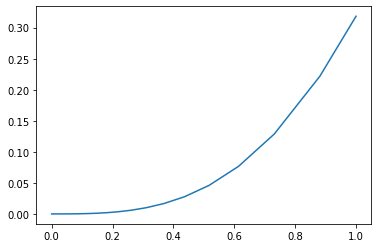

In [10]:
plt.plot(sol.t, sol.y[0])
plt.show

## Метод ФЕЛЬБЕРГА 4(5)

In [17]:
def raight_part (t, y): return t*t-y*y
def kk1 (h): return raight_part (t, y)
def kk2 (h): return raight_part (t+0.25*h, y+0.25*h*kk1(h))    
def kk3 (h): return raight_part (t+(3/8)*h, y+h*((3/32)*kk1(h)+(9/32)*kk2(h)))
def kk4 (h): return raight_part (t+(12/13)*h, y+h*((1932/2197)*kk1(h)-(7200/2197)*kk2(h) + (7296/2197)*kk3(h)))
def kk5 (h): return raight_part (t+h, y+h*((439/216)*kk1(h)-8*kk2(h) + (3680/513)*kk3(h)-(845/4104)*kk4(h)))
def kk6 (h): return raight_part (t+0.5*h, y+h*(-(8/27)*kk1(h)+2*kk2(h) - (3544/2565)*kk3(h)+(1859/4104)*kk4(h)-(11/40)*kk5(h)))

In [18]:
/# НАЙПРОСТІША ПРОГРАМА 
y0 = 0 # почткові умови
ts = 0.0 # початок відрізку інтегрування
tf = 1.0 # кінець відрізку інтегрування
n  = 10  # кількість кроків
h  = (tf-ts)/n  # довжина кроку
solution = np.zeros([3, n+1], dtype=np.float64) # масив результаті інтегрування
solution [0,0] = ts
solution [1,0] = y0
y = y0
t = ts
i = 0
while i < n:
    y += h*((25/216)*kk1(h)+(1408/2565)*kk3(h)+(2197/4104)*kk4(h)-(1/5)*kk5(h))
    i += 1
    t += h
    eps = h*((1/360)*kk1(h)-(128/4275)*kk3(h)-(2197/75240)*kk4(h)+(1/50)*kk5(h)+(2/5)*kk6(h))
    solution [0,i] = t
    solution [1,i] = y
    solution [2,i] = eps
print (solution)

[[0.00000000e+00 1.00000000e-01 2.00000000e-01 3.00000000e-01
  4.00000000e-01 5.00000000e-01 6.00000000e-01 7.00000000e-01
  8.00000000e-01 9.00000000e-01 1.00000000e+00]
 [0.00000000e+00 3.33331859e-04 2.66646407e-03 8.99653178e-03
  2.13073704e-02 4.15431320e-02 7.15591276e-02 1.13044876e-01
  1.67418457e-01 2.35698099e-01 3.18366243e-01]
 [0.00000000e+00 8.18135600e-04 2.27174064e-03 4.44712702e-03
  7.33021012e-03 1.08891036e-02 1.50639464e-02 1.97563585e-02
  2.48210172e-02 3.00627778e-02 3.52430134e-02]]


## Рішення системи рівняннь